# GBM Using Stochastic Differential Equation

The Geometric Brownian Motion stochastic differential equation is given by

$$ \Large dS = \mu S dt + \sigma S dW $$

where $$ \large dW = \epsilon \sqrt{dt} $$

dt = small time (1/365 = 0.00274) <br>
$ \mu $ = mean daily simple return <br>
$ \sigma $ = standard deviation of daily simple return <br>
$ \epsilon $ = standard normal random variable <br>
 

## GBM Paths

Let's generate stock paths using the above stochastic differential equations. <br>

We will use dt = 1/365 = 0.00274 (one day) <br>

In [32]:
import numpy as np 
import scipy.stats as stats
import matplotlib.pyplot as plt
from numba import jit, njit

In [33]:
# Number of paths
I = 100000

# number of steps
n = 3650

# Initial stock price
S0 = 100 

# time step (1 day)
dt = 1/365

# Total time for paths (years)
T= 10

# array of paths (each path runs column-wise, initial stock price in first row)
S = np.zeros((n, I))

# print(S)
# print(S.shape)

# add array of S0s as first row (we do this by stacking on the original S matrix) 
S = np.vstack([np.repeat(S0, I), S])

# print(S)
# print(S.shape)

# daily mean returns (annualized)
mu = 0.05

# standard deviation of daily returns
sigma = 0.25

# @jit
# def Paths():
for i in range(1, 3651):
  
  ds = mu * S[i-1] * dt + sigma * S[i-1] * np.random.standard_normal(I) * np.sqrt(dt)
  
  S[i] = S[i-1] + ds

# Paths()
  
S[3650]

array([138.99901909,  62.88521124, 193.51680999, ..., 155.49715235,
        61.5152892 , 376.62120553])

## Plot GBM Paths

In [34]:
# Let's plot these, select a linspace for the time (we add extra row because we added an extra row to original matrix)

time_axis = np.linspace(0, T, n + 1)

print(time_axis)
print(time_axis[365])    # first year
print(time_axis[730])    # second year

[0.00000000e+00 2.73972603e-03 5.47945205e-03 ... 9.99452055e+00
 9.99726027e+00 1.00000000e+01]
1.0
2.0


In [35]:
# but we need the above time for each column of the price matrix (i.e. for each path)

tt = np.full((I, n+1), fill_value = time_axis)

tt = tt.transpose()

tt

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.73972603e-03, 2.73972603e-03, 2.73972603e-03, ...,
        2.73972603e-03, 2.73972603e-03, 2.73972603e-03],
       [5.47945205e-03, 5.47945205e-03, 5.47945205e-03, ...,
        5.47945205e-03, 5.47945205e-03, 5.47945205e-03],
       ...,
       [9.99452055e+00, 9.99452055e+00, 9.99452055e+00, ...,
        9.99452055e+00, 9.99452055e+00, 9.99452055e+00],
       [9.99726027e+00, 9.99726027e+00, 9.99726027e+00, ...,
        9.99726027e+00, 9.99726027e+00, 9.99726027e+00],
       [1.00000000e+01, 1.00000000e+01, 1.00000000e+01, ...,
        1.00000000e+01, 1.00000000e+01, 1.00000000e+01]])

Only plot 10 paths for clarity

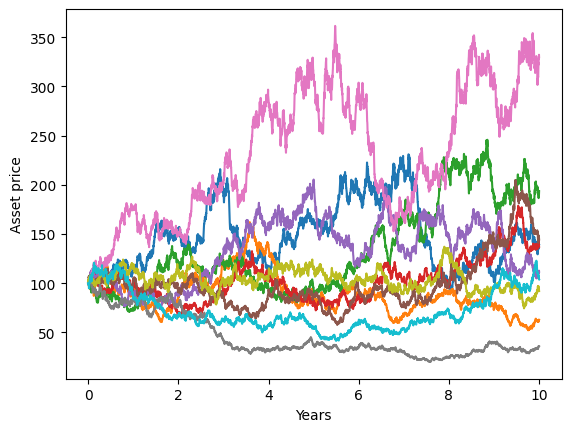

In [36]:
plt.plot(tt[:,:10], S[:,:10])

plt.xlabel("Years")

plt.ylabel("Asset price")

plt.show()

## Statistical Results

In [57]:
print ("For year 1\n")

year1_mean = np.mean(S[365])
year1_std = np.std(S[365])

print(f"{'data stock price mean':>30} \t{year1_mean:.3f}")
print(f"{'formula stock price mean':>30} \t{S0 * np.exp(mu*1):.3f}")
print(f"{'data std':>30} \t{year1_std:.3f}")
print(f"{'formula std':>30} \t{S0 * np.exp(mu*1) * np.sqrt(np.exp(1*(sigma)**2) -1):.3f}")

print ("\nFor year 2\n")

year2_mean = np.mean(S[730])
year2_std = np.std(S[730])

print(f"{'data stock price mean':>30} \t{year2_mean:.3f}")
print(f"{'formula stock price mean':>30} \t{S0 * np.exp(mu*2):.3f}")
print(f"{'data std':>30} \t{year2_std:.3f}")
print(f"{'formula std':>30} \t{S0 * np.exp(mu*2) * np.sqrt(np.exp(2*(sigma)**2) -1):.3f}")

print ("\nFor year 3\n")

year3_mean = np.mean(S[1095])
print("%14s %14.3f" % ('   data stock price mean', year3_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*3)))

year3_std = np.std(S[1095])
print("%14s %14.3f" % ('                data std', year3_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*3)*np.sqrt(np.exp(3*(sigma)**2) -1)))

print ("\nFor year 4\n")

year4_mean = np.mean(S[1460])
print("%14s %14.3f" % ('   data stock price mean', year4_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*4)))

year4_std = np.std(S[1460])
print("%14s %14.3f" % ('                     std', year4_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*4)*np.sqrt(np.exp(4*(sigma)**2) -1)))

print ("\nFor year 5\n")

year5_mean = np.mean(S[1825])
print("%14s %14.3f" % ('   data stock price mean', year5_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*5)))

year5_std = np.std(S[1925])
print("%14s %14.3f" % ('                     std', year5_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*5)*np.sqrt(np.exp(5*(sigma)**2) -1)))

print ("\nFor year 6\n")

year6_mean = np.mean(S[2190])
print("%14s %14.3f" % ('   data stock price mean', year6_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*6)))

year6_std = np.std(S[2190])
print("%14s %14.3f" % ('                     std', year6_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*6)*np.sqrt(np.exp(6*(sigma)**2) -1)))

print ("\nFor year 7\n")

year7_mean = np.mean(S[2555])
print("%14s %14.3f" % ('   data stock price mean', year7_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*7)))

year7_std = np.std(S[2555])
print("%14s %14.3f" % ('                     std', year7_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*7)*np.sqrt(np.exp(7*(sigma)**2) -1)))

print ("\nFor year 8\n")

year8_mean = np.mean(S[2920])
print("%14s %14.3f" % ('   data stock price mean', year8_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*8)))

year8_std = np.std(S[2920])
print("%14s %14.3f" % ('                     std', year8_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*8)*np.sqrt(np.exp(8*(sigma)**2) -1)))

print ("\nFor year 9\n")

year9_mean = np.mean(S[3285])
print("%14s %14.3f" % ('   data stock price mean', year9_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*9)))

year9_std = np.std(S[3285])
print("%14s %14.3f" % ('                     std', year9_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*9)*np.sqrt(np.exp(9*(sigma)**2) -1)))

print ("\nFor year 10\n")

year10_mean = np.mean(S[3650])

print("%14s %14.3f" % ('   data stock price mean', year10_mean))
print('%14s %14.3f' % ('formula stock price mean', S0*np.exp(mu*10)))

year10_std = np.std(S[3650])
print("%14s %14.3f" % ('                     std', year10_std))
print("%14s %14.3f" % ('             formula std', S0*np.exp(mu*10)*np.sqrt(np.exp(10*(sigma)**2) -1)))

For year 1

         data stock price mean 	105.243
      formula stock price mean 	105.127
                      data std 	26.729
                   formula std 	26.698

For year 2

         data stock price mean 	110.787
      formula stock price mean 	110.517
                      data std 	40.425
                   formula std 	40.327
   data stock price mean        110.787
formula stock price mean        110.517
                data std         40.425
             formula std         40.327

For year 3

   data stock price mean        116.296
formula stock price mean        116.183
                data std         52.916
             formula std         52.762

For year 4

   data stock price mean        122.222
formula stock price mean        122.140
                     std         65.617
             formula std         65.093

For year 5

   data stock price mean        128.486
formula stock price mean        128.403
                     std         81.773
             formula